In [90]:
step =10000
for batch in hp.iterate(['/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_2_12_24/skim_50nA_OB_job_3313_0.hipo'],banks=["MC::Lund", "REC::Particle", "REC::Traj"],step=step):
    #print(batch.keys()) 
    #batch.keys()
    dic = batch.keys() 
    break  
    
for battch in hp.iterate(['/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_2_12_24/analysis2/kinematics_out_skim_50nA_OB_job_3313_0.hipo'],banks=["REC::Kinematics"],step=step):
    print(battch.keys()) 
    #batch.keys()
    dic = battch.keys() 
    break 
    


#getting electron stuff.
#initial beam = 10.6
#ask about units of kin bank. the e_electron that I calcualte is always so much higher than the inital beam energy, so Q^2 is always big. and the units of momentum in RED Particle. 
l_inital = 10.6*10**3 #MeV
e_mass = .510 #MeV
P_mass = 938 #MeV
pi_mass = 139 #MeV  


all_keys            = list(batch.keys())
rec_particle_name   = 'REC::Particle'
rec_particle_keys   = get_bank_keys(rec_particle_name,all_keys)
rec_traj_name       = 'REC::Traj'
rec_traj_keys       = get_bank_keys(rec_traj_name,all_keys)
rec_kinematics_name = 'REC::Kinematics' 
rec_kinematics_keys = get_bank_keys(rec_kinematics_name,all_keys)
mc_lund_name        = 'MC::Lund'
mc_lund_keys        = get_bank_keys(mc_lund_name,all_keys) 

rec_kinematics_keys = ['REC::Kinematics_idxe', 'REC::Kinematics_idxp', 'REC::Kinematics_idxpi', 'REC::Kinematics_Q2', 
                       'REC::Kinematics_nu', 'REC::Kinematics_W', 'REC::Kinematics_x', 'REC::Kinematics_y', 'REC::Kinematics_z', 'REC::Kinematics_xF', 'REC::Kinematics_mass']

momentum_p = [
]
momentum_pi = []
momentum_e = []
momentum_et = []

kinn = []
for i in range(step):
    # Get REC::Particle bank
    rec_particle_event_table = get_event_table(rec_particle_keys,i,batch,dtype=float)

    # Get REC::Traj bank
    rec_traj_event_table = get_event_table(rec_traj_keys,i,batch,dtype=float)

    # Get REC::Kinematics bank
    rec_kinematics_event_table = get_event_table(rec_kinematics_keys,i,battch,dtype=float)

    # Get MC::Lund bank and MC->REC matching indices
    mc_lund_event_table = get_event_table(mc_lund_keys,i,batch,dtype=float)
    match_indices  = get_match_indices(rec_particle_event_table,mc_lund_event_table)
    
    #getting the index of where the electron proton and pion r 
    savee = batch['REC::Particle_pid'][i]
    j = savee.index(2212); kk = savee.index(-211); elc = savee.index(11) 
    #print(elc)
    #saving there moemntum to lists.  
    momentum_p += [[batch['REC::Particle_px'][i][j], [batch['REC::Particle_py'][i][j]], batch['REC::Particle_pz'][i][j]]]
     
    momentum_pi += [[batch['REC::Particle_px'][i][kk], batch['REC::Particle_py'][i][kk], batch['REC::Particle_pz'][i][kk]]]
    momentum_e += [[batch['REC::Particle_px'][i][elc], batch['REC::Particle_py'][i][elc], batch['REC::Particle_pz'][i][elc]]]
    momentum_et += [[batch['MC::Lund_px'][i][3], batch['MC::Lund_py'][i][3], batch['MC::Lund_pz'][i][3]]]
    
    kinn+= [[battch['REC::Kinematics_Q2'][i][0], battch['REC::Kinematics_nu'][i][0], battch['REC::Kinematics_W'][i][0], battch['REC::Kinematics_x'][i][0],  
           battch['REC::Kinematics_y'][i][0], battch['REC::Kinematics_z'][i][0], battch['REC::Kinematics_xF'][i][0], battch['REC::Kinematics_mass'][i][0]]]

dict_keys(['REC::Kinematics_idxe', 'REC::Kinematics_idxp', 'REC::Kinematics_idxpi', 'REC::Kinematics_Q2', 'REC::Kinematics_nu', 'REC::Kinematics_W', 'REC::Kinematics_x', 'REC::Kinematics_y', 'REC::Kinematics_z', 'REC::Kinematics_xF', 'REC::Kinematics_mass'])


(array([  65.,  467., 1364., 1976., 1149., 1266., 1921., 1326.,  415.,
          51.]),
 array([-1.63020003, -1.30144002, -0.97268002, -0.64392002, -0.31516001,
         0.01359999,  0.34236   ,  0.67112   ,  0.99988   ,  1.32864001,
         1.65740001]),
 <BarContainer object of 10 artists>)

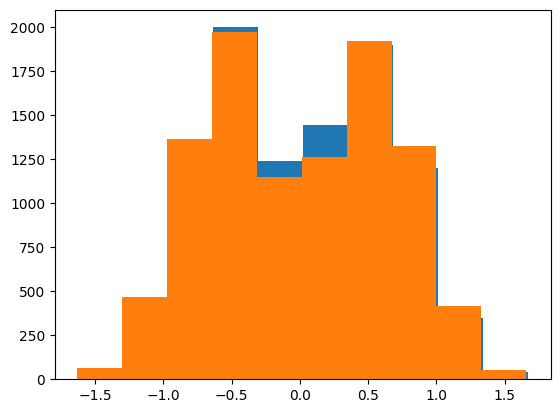

In [91]:
xxx = []; yyy = []; zzz= []
xxxx = []; yyyy = []; zzzz= []
for i in range(step):
    xxx.append(momentum_e[i][0])
    yyy.append(momentum_e[i][1])
    zzz.append(momentum_e[i][2])
    
    xxxx.append(momentum_et[i][0])
    yyyy.append(momentum_et[i][1])
    zzzz.append(momentum_et[i][2])
plt.hist(xxx)
plt.hist(xxxx)

(array([  19.,  267., 1438., 1534., 1550., 1691., 1367., 1723.,  380.,
          31.]),
 array([-1.78369999, -1.43365999, -1.08362   , -0.73358001, -0.38354001,
        -0.03350002,  0.31653998,  0.66657997,  1.01661997,  1.36665996,
         1.71669996]),
 <BarContainer object of 10 artists>)

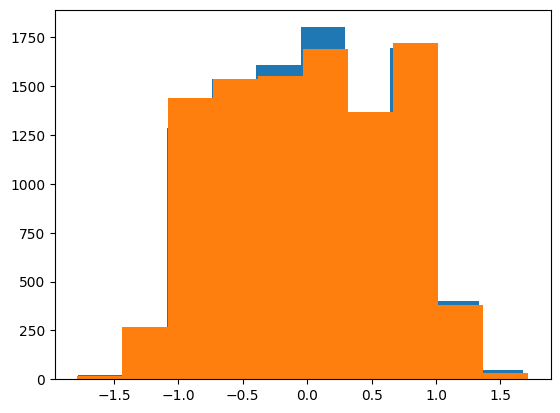

In [92]:
plt.hist(yyy)
plt.hist(yyyy)

10000 10000


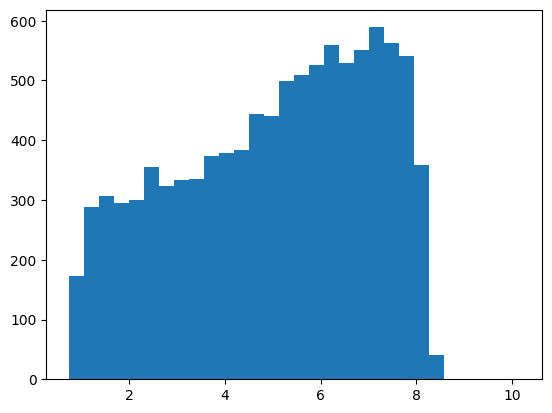

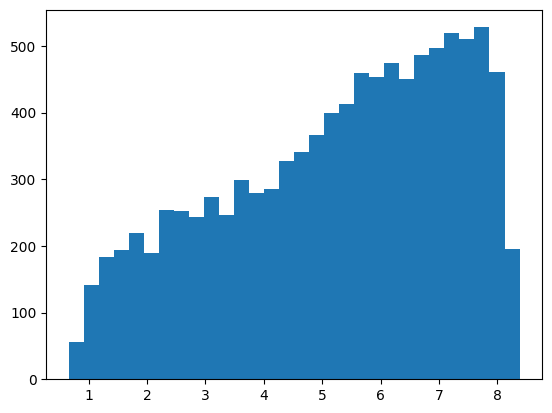

In [101]:
print(len(zzz), len(zzzz))
plt.figure() 
h = plt.hist(zzz, bins = 30)
plt.figure()
hhh= plt.hist(zzzz, bins = 30)

Text(0.5, 1.0, 'blue is mine, orange is true')

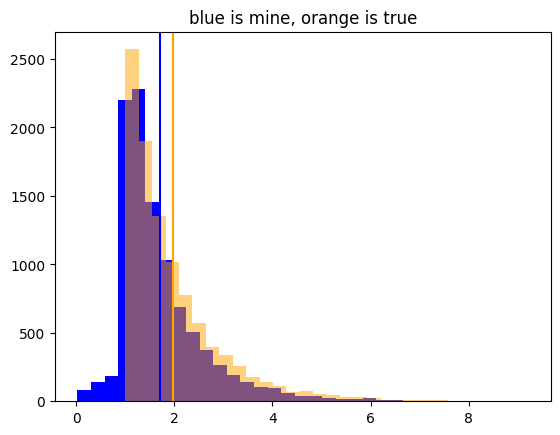

In [39]:
import matplotlib.pyplot as plt

#QQ = -(l-l’)^2 = -(E-E’, p-p’)^2 = -((E-E’)^2 - (p-p’)^2 
# E^2 = P^2+M^2 = p^2 as m = small. 

#inital energy
E_inital = 10.6 #GeV

# fidning p^2. dot product add components of momentum together after multiplying by itself. 
pp_e = np.zeros(step)
for i in range(step): 
    mome =0
    for j in range(3):
        mome += momentum_e[i][j]*momentum_e[i][j]
    pp_e[i] =mome

P_inital  = [0,0, 10.6]
#finding p-p'
difff = np.zeros(step)
for i in range(step):
    idkk = 0
    for j in range(3): 
        idkk += (P_inital[j]-momentum_e[i][j]) *(P_inital[j]-momentum_e[i][j])
    difff[i] = idkk

    # putting togetherr 
QQ = np.zeros(step)
QQ_Tru = np.zeros(step)
for ii in range(step):
    QQ[ii] = -((E_inital-np.sqrt(pp_e[ii]))**2 -difff[ii])
    QQ_Tru[ii] = battch['REC::Kinematics_Q2'][ii][0]


plt.hist(QQ, color = 'blue', bins = 30)
plt.hist(QQ_Tru, color = 'orange', alpha = .5, bins = 30) 
plt.axvline(x = np.mean(QQ), color = 'blue')
plt.axvline(x = np.mean(QQ_Tru), color = 'orange')
plt.title('blue is mine, orange is true') 

10000
10000


Text(0.5, 1.0, 'blue is mine, orange is true')

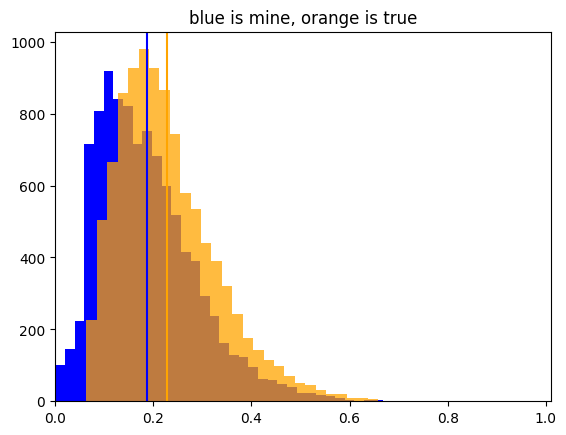

In [71]:

#P*q = (Proton_mass,0,0,0)*(E_intiial-electron_E,...)=(Proton_mass*(E_initial-sqrt(pp_e)))
P_mass = .938 #GeV
e_mass = .511*10**-3 #GeV 
#E_inital-np.sqrt(pp_e[ii]) #the first part of q

x_B = np.zeros(step)
x_B_Tru = np.zeros(step)
# x_banot  =np.zeros(step)
for i in range(step):
    x_B[i] = QQ[i]/2/(P_mass*(E_inital-(np.sqrt(pp_e[i])+e_mass**2)))
    x_B_Tru[i] = battch['REC::Kinematics_x'][i][0]
    #x_banot[i]  = battch['REC::Kinematics_Q2'][i][0]/2/(P_mass*(E_inital-np.sqrt(pp_e[i])))

print(len(x_B))
print(len(x_B_Tru))
plt.hist(x_B, color = 'blue', bins = 500)
plt.hist(x_B_Tru, color = 'orange', alpha= .75, bins = 30) 
#plt.hist(x_banot, color = 'green',alpha = .5,  bins = 300) 
plt.axvline(x = np.mean(x_B), color = 'blue')
plt.axvline(x = np.mean(x_B_Tru), color = 'orange') 
plt.xlim(0, 1.01)
plt.title('blue is mine, orange is true') 

Text(0.5, 1.0, 'y, blue is mine, orange is true')

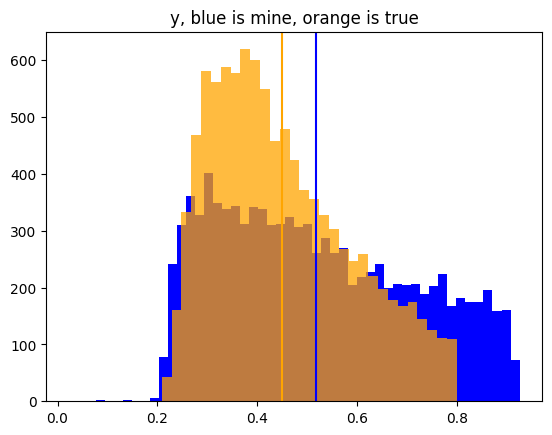

In [74]:
y = np.zeros(step) 
y_true = np.zeros(step)

for i in range(step):
    y[i] = P_mass*(E_inital-(np.sqrt(pp_e[i])+e_mass**2))/(P_mass*10.6)
    y_true[i] = battch['REC::Kinematics_y'][i][0]
plt.hist(y, color = 'blue', bins = 50)
plt.hist(y_true, color = 'orange', alpha= .75, bins = 30)
#plt.hist(x_banot, color = 'green',alpha = .5,  bins = 300) 
plt.axvline(x = np.mean(y), color = 'blue')
plt.axvline(x = np.mean(y_true), color = 'orange') 

plt.title('y, blue is mine, orange is true')

In [ ]:
def x_B(QQ, P, q):
    a = QQ/2
    b = np.dot(np.array(P),q)
    return a/ b
def y_B(P, q):
    return P*q/(P*l_inital)
def z_B(P,P_h, q):
    return P*P_h/(P*q)


In [1]:
import numpy as np
import awkward as ak
import pandas as pd
#import dask
#import dask.dataframe as dd

# I/O
import uproot as ur
import hipopy.hipopy as hp # <--- Package for reading in the hipo files

# Plotting
import matplotlib.pyplot as plt

# Physics
from particle import PDGID

# Miscellaneous
import os
import sys #NOTE: ADDED
import tqdm

# ML Imports
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch_geometric as tg
# HIPO bank reading and linking functions

from torch_geometric.data import Data as dt

def get_bank_keys(bank_name,all_keys,separator='_'):
    """
    :description: Get list of the keys for given bank name from a list of all batch keys.
    
    :param: bank_name
    :param: all_keys
    :param: separator='_'
    
    :return: bank_keys
    """
    bank_keys = []
    for key in all_keys:
        if key.startswith(bank_name+separator):
            bank_keys.append(key)
    return bank_keys
        
def get_event_table(bank_keys,event_num,batch,dtype=float):
    """
    :description: Get a bank event table as a numpy array of shape (number of columns, number of rows).
    
    :param: bank_keys
    :param: event_num
    :param: batch
    :param: dtype=float
    
    :return: bank_table
    """
    bank_table = []
    bank_table = np.moveaxis(np.array([batch[key][event_num] for key in bank_keys], dtype=dtype),[0,1],[1,0])
    return bank_table

def get_link_indices(event_table_rec_particle,event_table,pindex_idx=1):
    """
    :description: Get index pairs linking entries in a bank back to entries in the 'REC::Particle' bank.
    
    :param: event_table_rec_particle
    :param: event_table
    :param: pindex_idx=1
    
    :return: link_indices
    """
    
    link_indices = []
    nrec = np.shape(event_table_rec_particle)[0]
    for rec_particle_idx in range(0,nrec):
        for event_table_idx, el in enumerate(event_table[:,pindex_idx]):
            if el==rec_particle_idx:
                link_indices.append([rec_particle_idx,event_table_idx])
    return np.array(link_indices,dtype=int) #NOTE: link_indices = [(event_table_idx,rec_particle_idx)]

def get_parent_indices(mc_event_table,index_idx=0,parent_idx=4,daughter_idx=5):
    """
    TODO
    """
    for mc_event_table_idx, index in enumerate(mc_event_table[:,index_idx]):
        pass
    pass
#get_match_
def get_match_indices(
    rec_event_table,
    mc_event_table,
    rec_px_idx             = 1,
    rec_py_idx             = 2,
    rec_pz_idx             = 3,
    rec_ch_idx             = 8,
    mc_px_idx              = 6,
    mc_py_idx              = 7,
    mc_pz_idx              = 8,
    mc_pid_idx             = 3,
    mc_daughter_idx        = 5,
    match_charge           = True,
    require_no_mc_daughter = True,
    enforce_uniqueness     = True,
    ):
    
    # Set minimum
    rec_final_state_min_idx = 1
    mc_final_state_min_idx  = 3 #NOTE: MC::Lund bank is structured [e, p, q, e', all the other final state particles...]
    
    # Initialize index map
    match_indices    = -np.ones((rec_event_table.shape[0],2),dtype=float)
    match_indices[0] = [0,3] #NOTE: Always match first entry in REC::Particle to scattered electron in MC::Lund.

    # Get REC::Particle info
    rec_px    = rec_event_table[:,rec_px_idx]
    rec_py    = rec_event_table[:,rec_py_idx]
    rec_pz    = rec_event_table[:,rec_pz_idx]
    rec_pT    = np.sqrt(np.square(rec_event_table[:,rec_px_idx])+np.square(rec_event_table[:,rec_py_idx]))
    rec_p     = np.sqrt(np.square(rec_event_table[:,rec_px_idx])+np.square(rec_event_table[:,rec_py_idx])+np.square(rec_event_table[:,rec_pz_idx]))
    rec_theta = np.array(rec_pz)
    rec_theta = np.arctan(rec_pT,rec_theta)
    rec_phi   = np.arctan2(rec_py,rec_px)
    
    # Get MC::Lund info
    mc_px    = mc_event_table[:,mc_px_idx]
    mc_py    = mc_event_table[:,mc_py_idx]
    mc_pz    = mc_event_table[:,mc_pz_idx]
    mc_pT    = np.sqrt(np.square(mc_event_table[:,mc_px_idx])+np.square(mc_event_table[:,mc_py_idx]))
    mc_p     = np.sqrt(np.square(mc_event_table[:,mc_px_idx])+np.square(mc_event_table[:,mc_py_idx])+np.square(mc_event_table[:,mc_pz_idx]))
    mc_theta = np.array(mc_pz)
    mc_theta = np.arctan(mc_pT,mc_theta)
    mc_phi   = np.arctan2(mc_py,mc_px)

    # Loop rec particles
    for rec_idx, rec_part in enumerate(rec_event_table):
        
        # Start with final state particles past scattered electron
        if rec_idx<rec_final_state_min_idx: continue
        
        # Get REC::Particle charge
        rec_ch = rec_event_table[rec_idx,rec_ch_idx]
        
        # Loop mc particles
        mc_match_idx = -1
        min_domega   = 9999
        for mc_idx, mc_part in enumerate(mc_event_table):
            
            # Start with final state particles past scattered electron
            if mc_idx<mc_final_state_min_idx:
                continue
            
            # Enforce unique matching
            if enforce_uniqueness and mc_idx in match_indices[:,1]:
                continue
            
            # Match charge and require that the MC particle be final state (no daughters)
            if match_charge and rec_ch!=PDGID(mc_event_table[mc_idx,mc_pid_idx]).charge:
                continue
            if require_no_mc_daughter and mc_event_table[mc_idx,mc_daughter_idx]!=0:
                continue
                
            # Get angular and momentum differences
            dp     = np.abs(rec_p[rec_idx]     - mc_p[mc_idx])
            dtheta = np.abs(rec_theta[rec_idx] - mc_theta[mc_idx])
            dphi   = np.abs(rec_phi[rec_idx]   - mc_phi[mc_idx]) if np.abs(rec_phi[rec_idx] - mc_phi[mc_idx])<np.pi else 2*np.pi-np.abs(rec_phi[rec_idx] - mc_phi[mc_idx])
            domega = dp**2 + dtheta**2 + dphi**2
            
            # Reset angular, momentum minimum difference
            if domega<min_domega:
                min_domega   = domega
                mc_match_idx = mc_idx
                
        # Append matched index pair
        match_indices[rec_idx] = [rec_idx,mc_match_idx]
        
    return np.array(match_indices,dtype=int) #NOTE: IMPORTANT!

def get_info(base_indices,link_indices,bank_entry_indices,bank_event_table):
    """
    :description: Get selected entry info from other banks linked to REC::Particle.
    
    :param: base_indices
    :param: link_indices #NOTE: if None assume bank is REC::Particle and use identity map
    :param: bank_entry_indices
    :param: bank_event_table
    
    :return: bank_info as awkward.Array
    """
    if link_indices is None:
        bank_info = []
        for base_idx in base_indices:
            base_info = bank_event_table[base_idx,bank_entry_indices]
            bank_info.append([base_info])
            
        return ak.Array(bank_info)
            
    bank_info = []
    for base_idx in base_indices:
        base_info = []
        for rec_particle_idx, link_idx in link_indices:
            if rec_particle_idx==base_idx:
                base_info.append(bank_event_table[link_idx,bank_entry_indices]) #NOTE: INDICES HAVE TO BE INTEGERS...COULD ADD CHECK...
        if len(base_info)==0: #NOTE: Address case that no matches exist between banks
            base_info.append(np.zeros((len(bank_entry_indices),)))
        bank_info.append(base_info)
    
    return ak.Array(bank_info)

def get_truth_info(base_indices,match_indices,truth_entry_indices,mc_event_table):
    """
    :description: Get selected entry info from other banks linked to REC::Particle.
    
    :param: base_indices
    :param: link_indices #NOTE: if None assume bank is REC::Particle and use identity map
    :param: bank_entry_indices
    :param: bank_event_table
    
    :return: bank_info as awkward.Array
    """
    
    bank_info = []
    for base_idx in base_indices:
        base_info = []
        for rec_particle_idx, match_idx in match_indices:
            if rec_particle_idx==base_idx:
                base_info.append(mc_event_table[match_idx,truth_entry_indices]) #NOTE: INDICES HAVE TO BE INTEGERS...COULD ADD CHECK...
        if len(base_info)==0: #NOTE: Address case that no matches exist between banks
            base_info.append(np.zeros((len(truth_entry_indices),)))
        bank_info.append(base_info)
    
    return ak.Array(bank_info)

def check_has_decay(rec_particle_event_table,mc_lund_event_table,match_indices,decay,
                    rec_particle_pid_idx=0,mc_lund_pid_idx=3,mc_lund_parent_idx=4,mc_lund_daughter_idx=5):
    
    """
    :description: Check if specified decay is present in MC::Lund bank and the decay daughters are
        matched to particles of the same pid in REC::Particle
    
    :param: rec_particle_event_table
    :param: mc_lund_event_table
    :param: match_indices
    :param: decay
    :param: rec_particle_pid_idx = 0
    :param: mc_lund_pid_idx      = 3
    :param: mc_lund_parent_idx   = 4
    :param: mc_lund_daughter_idx = 5
    
    :return: boolean has_decay
    """
    
    has_decay = False
    decay_indices = None
    rec_indices = [-1 for i in range(len(decay[1]))] #NOTE: This assumes a 1-level decay...#TODO: Write more robust algorithm.
    if np.max(match_indices[:,-1])==-1: return has_decay, rec_indices #NOTE: This is the case of no matches at all.
    
    # Check if parent pid is in MC::Lund
    if not decay[0] in mc_lund_event_table[:,mc_lund_pid_idx]: return has_decay, rec_indices
    
    # Loop MC::Lund to find parent
    for parent_idx, parent_pid in enumerate(mc_lund_event_table[:,mc_lund_pid_idx]):
        if parent_pid==decay[0]:
#             print("DEBUGGING: found parent_pid == ",decay[0])
            
            # Check daughter pids in MC::Lund
            daughter_idx     = int(mc_lund_event_table[parent_idx,mc_lund_daughter_idx])-1 #NOTE: -1 is important because Lund index begins at 1.
            try:
                daughter_pids    = mc_lund_event_table[daughter_idx:daughter_idx+len(decay[1]),mc_lund_pid_idx]
            except Exception as e:
                print(e)
                print("DEBUGGING: np.shape(mc_lund_event_table) = ",np.shape(mc_lund_event_table))
                print("DEBUGGING: daughter_idx        = ",daughter_idx)
                print("DEBUGGING: decay = ",decay)
                raise Exception
            daughter_parents = mc_lund_event_table[daughter_idx:daughter_idx+len(decay[1]),mc_lund_parent_idx]
            daughter_parents -= 1 #NOTE: Important because Lund index begins at 1.
            if np.all(daughter_parents==parent_idx) and np.all(daughter_pids==decay[1]): #NOTE: this relies on input arrays being np...
                decay_indices = [parent_idx,[daughter_idx+i for i in range(len(decay[1]))]]
                rec_indices = [-1 for i in range(len(decay[1]))]#NOTE: Reset in case you have two not fully matched decays...unlikely but possible.
                
                # Now check that there is a match of the same pid in REC::Particle
                num_matched_daughters = 0
                num_daughters         = len(decay[1])
                for decay_idx, mc_idx in enumerate(decay_indices[1]):
                    for el in match_indices:
                        if el[1]==mc_idx:
                            rec_idx = el[0]
                            if rec_particle_event_table[rec_idx,rec_particle_pid_idx] == decay[1][decay_idx]:
                                num_matched_daughters += 1
                                rec_indices[decay_idx] = rec_idx #NOTE: That this is the actual index beginning at 0.
#                 print("DEBUGGING: num_matched_daughters = ",num_matched_daughters)
#                 print("DEBUGGING: decay_indices = ",decay_indices)
                if num_matched_daughters == num_daughters:
                    has_decay = True
    
    return has_decay, rec_indices

# Select requested rows from REC::Particle data
def get_sub_array(arr,indices):
    
    """
    :description: Get sub array at indices along axis 1.
    
    :param: arr
    :param: indices
    
    :return: np.array new_arr
    """
    
    new_array = []
    for i in indices:
        new_array.append(arr[:,i])
    new_array = np.moveaxis(np.array(new_array),[0,1],[1,0])

    return new_array

def replace_pids(arr,pid_map,pid_i=0):
    """
    :description: Replace pids in given array roughly following scheme described in arxiv:1810.05165.
    
    :param: arr masked ndarray with dtype=float
    :param: pid_i last depth index for pids in arr
    """
    
    if 'int' in str(arr.dtype):
        print(" *** ERROR *** array passed to replace_pids should not have dtype==int")
        return
    
    for key in pid_map:
        arr[:,pid_i] = np.where(arr[:,pid_i]==key,
                                  pid_map[key],
                                  arr[:,pid_i])

def preprocess(x):
    """
    :description: Run preprocessing on input array.
    
    :param: x
    
    :return: new_x
    """
    #NOTE: Assume indices go 0-6 : pid, px, py, pz, beta, chi2pid, status
    
    pid_map = {
        22:0.0,
        11:-1.0,
        -11:1.0,
        2212:0.8,
        -2212:-0.8,
        2112:0.5,
        111:0.1,
        211:0.6,
        -211:-0.6,
        311:0.3,
        321:0.4,
        -321:-0.4,
        45:0.0
    }
    
    pid_idx, px_idx, py_idx, pz_idx, beta_idx, chi2pid_idx, status_idx = [i for i in range(np.shape(x)[-1])]
    
    # Reassign PIDs
    replace_pids(x,pid_map,pid_i=0)
    
    # Compute new arrays
    pT    = np.sqrt(np.add(np.square(x[:,px_idx]),np.square(x[:,py_idx])))
    phi   = np.arctan2(x[:,py_idx],x[:,px_idx])
    theta = np.divide(pT,x[:,pz_idx])
    beta  = np.log(x[:,beta_idx])
    
    #TODO: Compute event level differences and normalize: pT, phi, theta, beta (apply lognorm first though...)
    pT    -= pT.mean()
    pT    /= np.abs(pT).max() if np.abs(pT).max() > 0.0 else 1.0
    phi   -= phi.mean()
    phi   /= np.abs(phi).max() if np.abs(phi).max() > 0.0 else 1.0
    theta -= theta.mean()
    theta /= np.abs(theta).max() if np.abs(theta).max() > 0.0 else 1.0
    beta  -= beta.mean()
    beta  /= np.abs(beta).max() if np.abs(beta).max() > 0.0 else 1.0
    
    # Reset px, py, pz, beta -> pT, phi, theta, beta
    x[:,px_idx]   = pT
    x[:,py_idx]   = phi
    x[:,pz_idx]   = theta
    x[:,beta_idx] = beta
    
#     # Preprocess pT, phi, theta
#     x[:,px_idx] /= 10.0
#     x[:,py_idx] /= np.pi
#     x[:,pz_idx] /= np.pi
    
#     # Preprocess beta variable
#     x[:,beta_idx] -= 1
    
    # Preprocess chi2pid
    chi2_max, chi2_default, chi2_replacement   = 10, 9999, 10 #NOTE: DEBUGGING: USED TO BE >=chi2_default below!
    x[:,chi2pid_idx]  = np.where(x[:,chi2pid_idx]>=chi2_default, chi2_replacement, x[:,chi2pid_idx])
    x[:,chi2pid_idx] /= chi2_max #NOTE: IMPORTANT!  NEEDS TO BE AFTER REPLACEMENT OF MAX ABOVE!
    
    # Preprocess status variable
    x[:,status_idx] /= 5000
    
    # Reassign all data values that are NaN or Inf to zero
    x = np.where(np.isnan(x), 0.0, x)
    x = np.where(np.isinf(x), 0.0, x)
    
    return x

def preprocess_rec_traj(x):
    """
    :description: Run preprocessing on input array assuming it is full matrix of REC::Traj bank.
    
    :param: x
    
    :return: new_x
    """
    #NOTE: Assume indices go 0-10 : pindex, index, detector, layer, x, y, z, cx, cy, cz, path
    
    pindex_idx, index_idx, detector_idx, layer_idx, x_idx, y_idx, z_idx, cx_idx, cy_idx, cz_idx, path_idx = [i for i in range(np.shape(x)[-1])]
    
    # Preprocess row info
#     x[:,x_idx]    -= 0.0
    x[:,x_idx]    /= 1500.0
#     x[:,y_idx]    -= 0.0
    x[:,y_idx]    /= 1500.0
    x[:,z_idx]    -= 1500.0/2
    x[:,z_idx]    /= 1500.0
#     x[:,cx_idx]   -= 0.0
#     x[:,cx_idx]   /= 1.0
#     x[:,cy_idx]   -= 0.0
#     x[:,cy_idx]   /= 1.0
    x[:,cz_idx]   -= 1.0
    x[:,cz_idx]   /= 2.0
    x[:,path_idx] -= 1500.0/2
    x[:,path_idx] /= 1500.0
    
    # Select rows to take #NOTE: Do this after preprocessing so indices make sense
    indices = [x_idx, y_idx, z_idx, cx_idx, cy_idx, cz_idx, path_idx]
    x = np.take(x,indices,axis=1)
    
    # Reassign all data values that are NaN or Inf to zero
    x = np.where(np.isnan(x), 0.0, x)
    x = np.where(np.isinf(x), 0.0, x)
    
    return x

def get_links_rec_traj(x):
    
    pindex = 0
    link_indices = []
    prev_el = -10
    for idx, el in enumerate(x[:,pindex]):
        if el != prev_el:
            link_indices.append([idx])
        else:
            link_indices[-1].append(idx)
        prev_el = el
        
    return link_indices

def get_edge_index_rec_traj(x):
    
    link_indices = get_links_rec_traj(x)
    
    edge_index = torch.tensor([[i,j] for el_ in link_indices for i in el_ for j in el_],dtype=torch.long)
        
    return edge_index

x___ = torch.tensor([[i//3] for i in range(15)],dtype=torch.long) 